In [79]:
from bs4 import BeautifulSoup 
from selenium import webdriver 
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.chrome.service import Service as ChromeService
from PIL import Image
import cv2

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
 
driver.get("http://naver.com")
time.sleep(2)
height = driver.execute_script("return Math.max(document.body.scrollHeight, document.documentElement.scrollHeight,document.body.offsetHeight, document.documentElement.offsetHeight,document.body.clientHeight, document.documentElement.clientHeight)")
print(height)
#close browser
driver.close()

#Open another headless browser with height extracted above
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument(f"--window-size=1920,{height}")
chrome_options.add_argument("--hide-scrollbars")
driver = webdriver.Chrome(options=chrome_options)
url="http://naver.com"
driver.get(url)
#pause 3 second to let page loads
time.sleep(3)
#save screenshot
driver.save_screenshot('screen_shot.png')
driver.close()


from PIL import Image

image1 = Image.open('screen_shot.PNG')
imag1_size = image1.size

print(imag1_size)

3322
(1920, 3322)


In [ ]:
!pip install 

In [ ]:
from PIL import Image
import os
from pilkit.processors import Thumbnail
# 이미지가 저장된 폴더 경로
folder_path = "D:\crawling_07_11"

# 폴더 내 모든 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # 이미지 파일 경로
        image_path = os.path.join(folder_path, filename)
        
        # 이미지 열기
        image = Image.open(image_path)
        
        # 변경할 가로 크기
        new_width = 1000
        
        # thumbnail 메서드를 사용하여 크기 조정 (LANCZOS 옵션 사용)
        processor=Thumbnail(width=new_width)
        image=processor.process(image)
        
        # 원본 파일과 동일한 이름으로 저장 (덮어쓰기)
        image.save('new.PNG')


In [54]:
image1 = Image.open('new.PNG')
imag1_size = image1.size

print(imag1_size)

(745, 1000)


ValueError: Could not save to JPEG for display

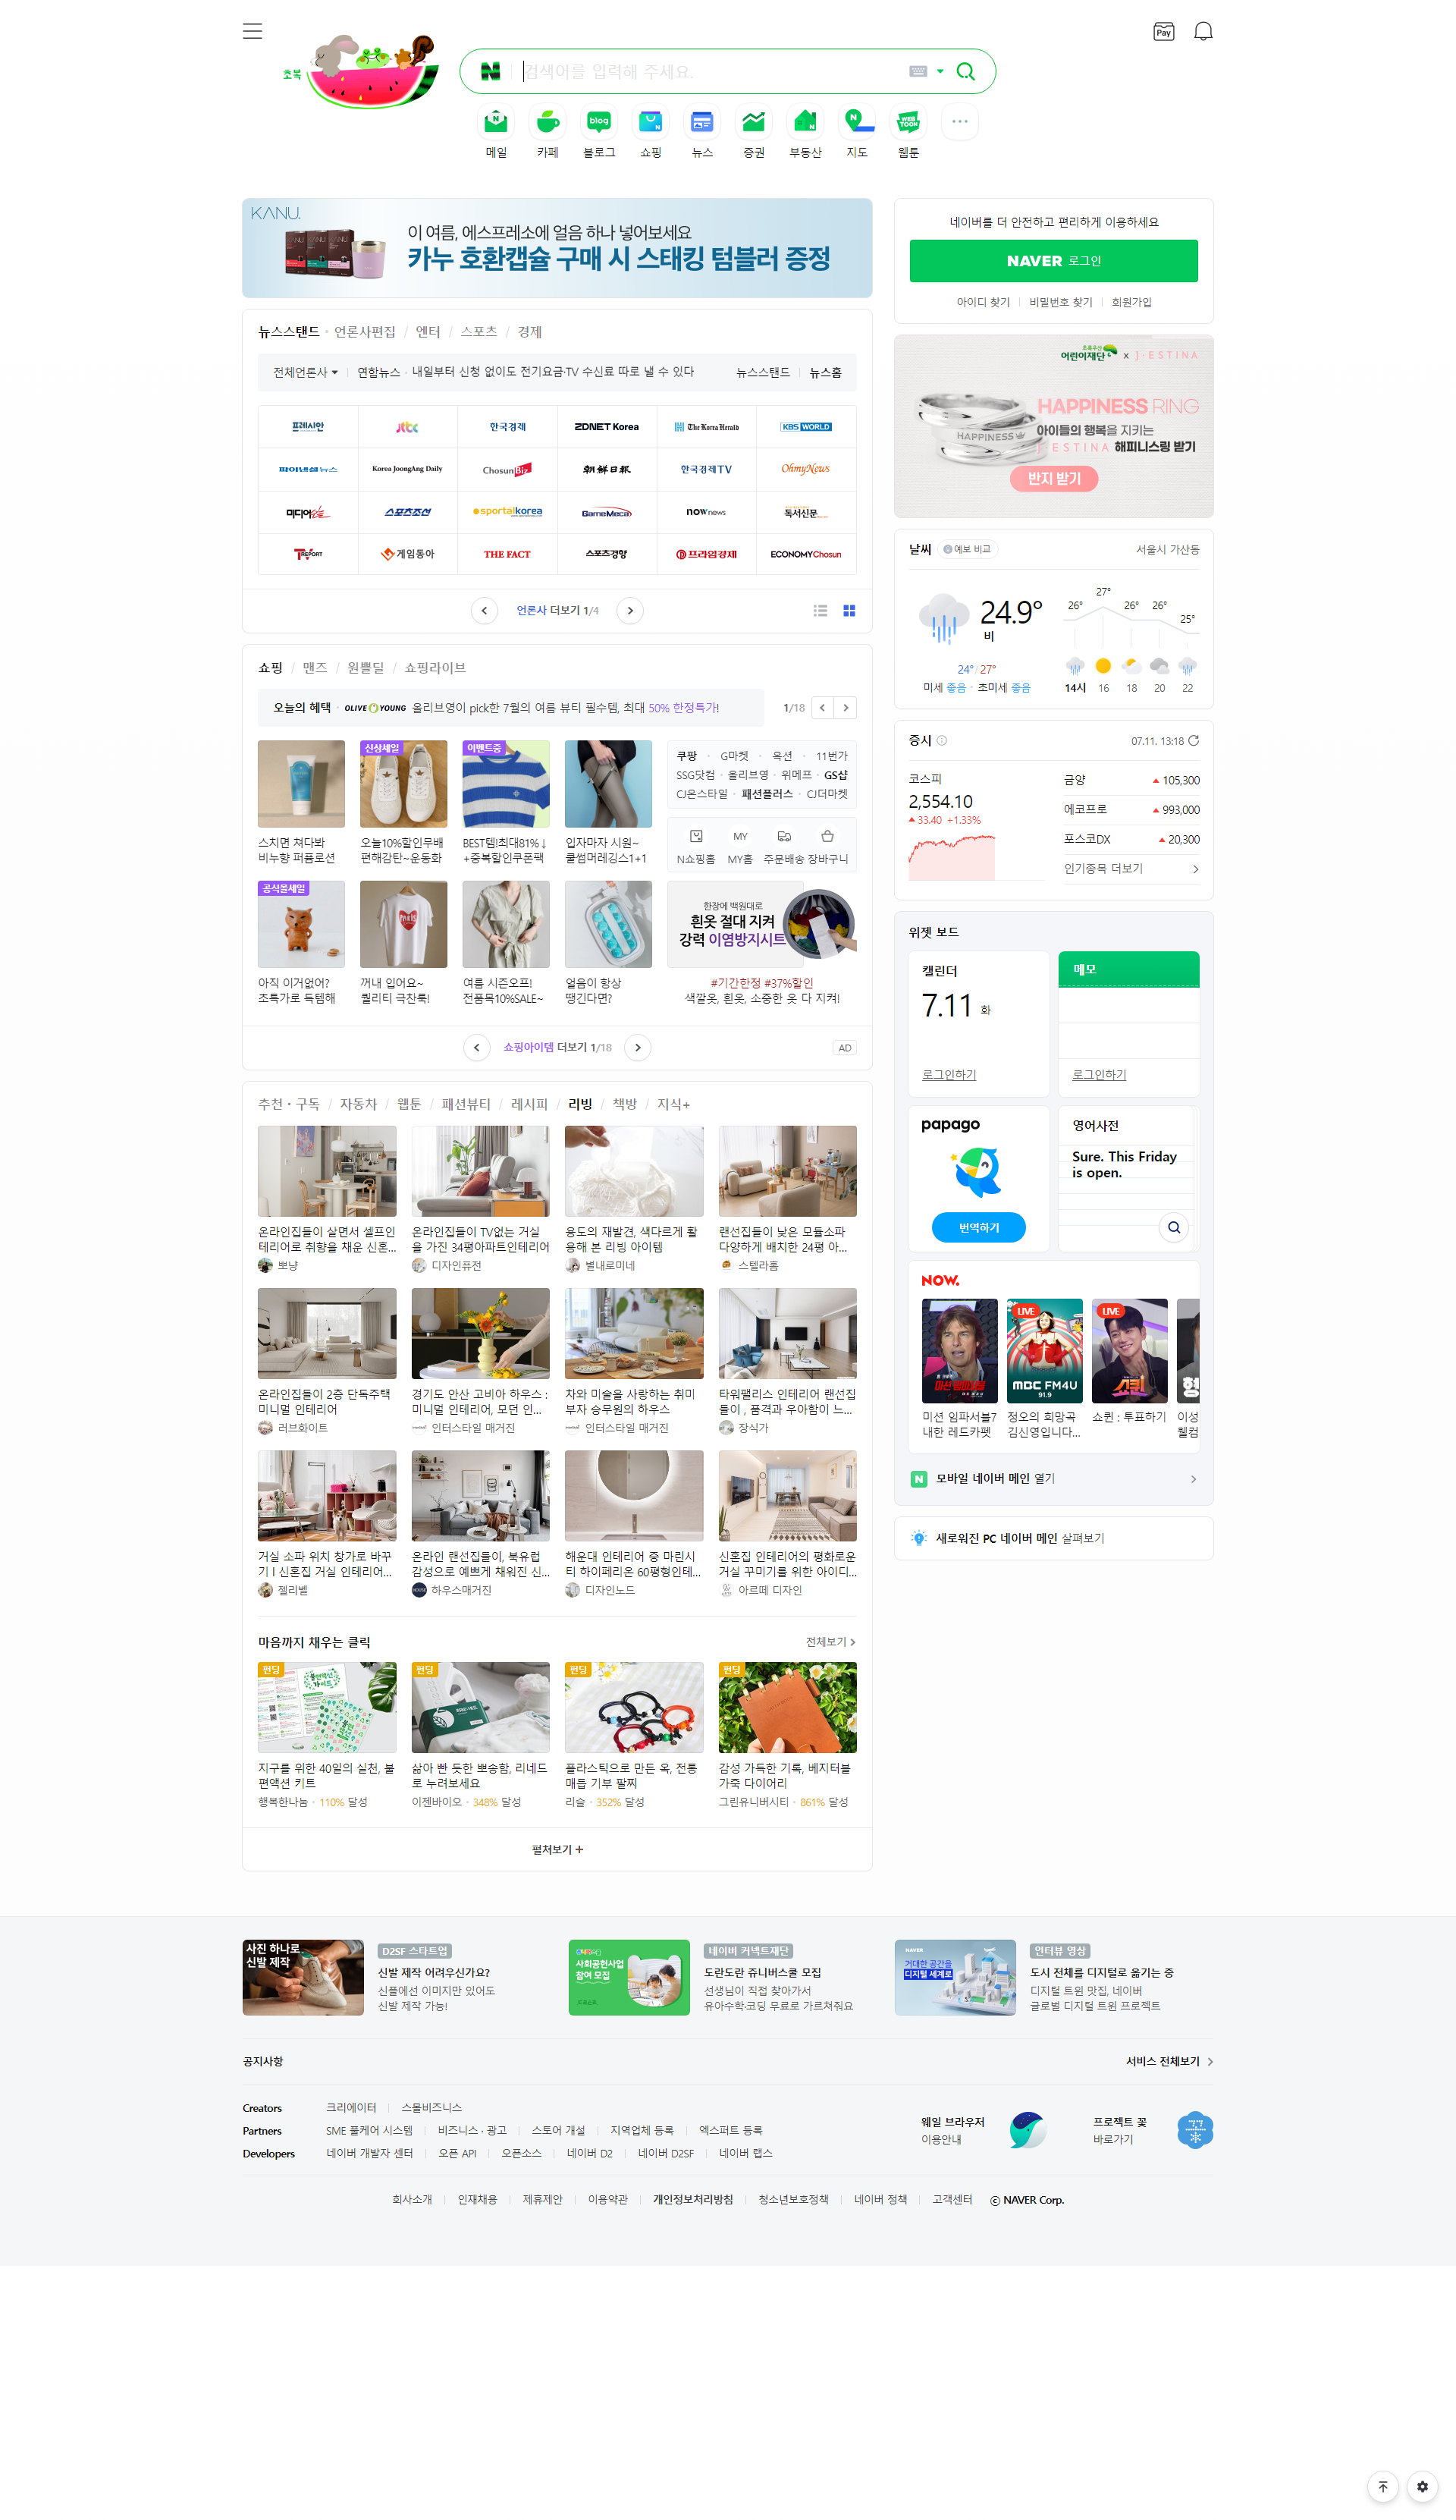

In [80]:
image1

In [87]:
from selenium.webdriver.common.by import By
X_path_for_test="""#newsstand"""

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
 
driver.get("http://naver.com")
time.sleep(2)
element1 = driver.find_element(By.CSS_SELECTOR,X_path_for_test)  

screenshot_as_bytes = element1.screenshot_as_png
with open('elemenent.png', 'wb') as f:
    f.write(screenshot_as_bytes) 
#close browser
driver.close()




In [88]:
image2 = Image.open('elemenent.png')

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

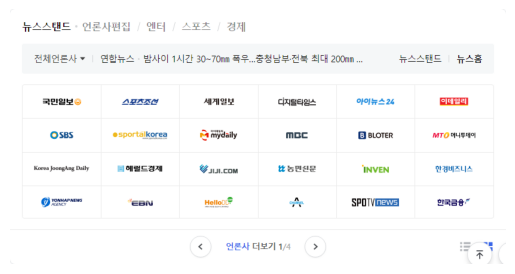

In [96]:
plt.imshow(image2)
plt.axis('off')
plt.show()

## Lambda function

In [ ]:
import json
import boto3
import botocore

BUCKET_NAME = 'file-upload-system-s3'
DIR_NAME = 'data/'
FILE_NAME = 'test.txt'
KEY = DIR_NAME + FILE_NAME

s3 = boto3.client('s3')

def lambda_handler(event, context):
    data = s3.get_object(Bucket = BUCKET_NAME, Key = KEY)
    res = data['Body'].read()
    print(res)
    return {
        'statusCode': 200,
        'body': json.dumps(res.decode('UTF-8'))
    }

Lambda+Trigger function으로 해야할듯..
아니면  SNS SQS?